# 1| what is HAR
* Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.
* Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting


# Why it is important ?
* Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations.
* Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.
* The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

In [ ]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


# 2| Importing libraries

In [2]:
import os
import glob
import random
import numpy as np
import pandas as pd

#import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
#from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# 3| Getting the path and Loading the data

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data

,filename,label
0,images_083.jpg,calling
1,images_084 (2).jpg,calling
2,images_084 (3).jpg,calling
3,images_084.jpg,calling
4,images_085 (2).jpg,calling
...,...,...
14995,images_410 (2).jpg,using_laptop
14996,images_410.jpg,using_laptop
14997,images_411.jpg,using_laptop
14998,images_412.jpg,using_laptop


In [5]:
test_data

,filename,label
0,images_006 (3).jpg,calling
1,images_006.jpg,calling
2,images_007 (2).jpg,calling
3,images_007.jpg,calling
4,images_008 (2).jpg,calling
...,...,...
2995,images_105 (4).jpg,using_laptop
2996,images_105.jpg,using_laptop
2997,images_106 (2).jpg,using_laptop
2998,images_106 (3).jpg,using_laptop


In [12]:
train_fol = glob.glob("train_data/*")
test_fol = glob.glob("test_data/*")

In [13]:
train_fol

['train_data\\calling',
 'train_data\\clapping',
 'train_data\\cycling',
 'train_data\\dancing',
 'train_data\\drinking',
 'train_data\\eating',
 'train_data\\fighting',
 'train_data\\hugging',
 'train_data\\laughing',
 'train_data\\listening_to_music',
 'train_data\\running',
 'train_data\\sitting',
 'train_data\\sleeping',
 'train_data\\texting',
 'train_data\\using_laptop']

In [14]:
test_fol

['test_data\\calling',
 'test_data\\clapping',
 'test_data\\cycling',
 'test_data\\dancing',
 'test_data\\drinking',
 'test_data\\eating',
 'test_data\\fighting',
 'test_data\\hugging',
 'test_data\\laughing',
 'test_data\\listening_to_music',
 'test_data\\running',
 'test_data\\sitting',
 'test_data\\sleeping',
 'test_data\\texting',
 'test_data\\using_laptop']

In [15]:
label_counts = train_data.label.value_counts()
for i, (label, count) in enumerate(label_counts.items(), 1):
    print(f"{i}. {label}: {count}")

1. calling: 1000
2. clapping: 1000
3. cycling: 1000
4. dancing: 1000
5. drinking: 1000
6. eating: 1000
7. fighting: 1000
8. hugging: 1000
9. laughing: 1000
10. listening_to_music: 1000
11. running: 1000
12. sitting: 1000
13. sleeping: 1000
14. texting: 1000
15. using_laptop: 1000


In [16]:
label_counts = test_data.label.value_counts()
for i, (label, count) in enumerate(label_counts.items(), 1):
    print(f"{i}. {label}: {count}")

1. calling: 200
2. clapping: 200
3. cycling: 200
4. dancing: 200
5. drinking: 200
6. eating: 200
7. fighting: 200
8. hugging: 200
9. laughing: 200
10. listening_to_music: 200
11. running: 200
12. sitting: 200
13. sleeping: 200
14. texting: 200
15. using_laptop: 200


In [17]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [18]:
import plotly.express as px
HAR = test_data.label.value_counts()
fig = px.pie(test_data, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [19]:
filename = train_data['filename']

situation = train_data['label']

In [20]:
filename2 = test_data['filename']

situation2 = test_data['label']

In [21]:
filename_all = filename + situation
print(filename_all)

0                 images_083.jpgcalling
1             images_084 (2).jpgcalling
2             images_084 (3).jpgcalling
3                 images_084.jpgcalling
4             images_085 (2).jpgcalling
                      ...              
14995    images_410 (2).jpgusing_laptop
14996        images_410.jpgusing_laptop
14997        images_411.jpgusing_laptop
14998        images_412.jpgusing_laptop
14999        images_413.jpgusing_laptop
Length: 15000, dtype: object


In [22]:
filename_all2 = filename2 + situation2
print(filename_all2)

0            images_006 (3).jpgcalling
1                images_006.jpgcalling
2            images_007 (2).jpgcalling
3                images_007.jpgcalling
4            images_008 (2).jpgcalling
                     ...              
2995    images_105 (4).jpgusing_laptop
2996        images_105.jpgusing_laptop
2997    images_106 (2).jpgusing_laptop
2998    images_106 (3).jpgusing_laptop
2999    images_106 (4).jpgusing_laptop
Length: 3000, dtype: object


# 4| Making function that take random path and display the image

In [23]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as img

def displaying_random_images():
    num = random.randint(1, 1000)
    imgg = "images_{}.jpg".format(num)
    train_data_path = "train_data/"
    
    # Loop through each subfolder
    for folder in os.listdir(train_data_path):
        folder_path = os.path.join(train_data_path, folder)
        if os.path.isdir(folder_path):
            img_path = os.path.join(folder_path, imgg)
            if os.path.exists(img_path):
                testImage = img.imread(img_path)
                plt.imshow(testImage)
                label = folder  # Assuming the folder name is the label
                plt.title("{}".format(label))
                plt.show()
                return
    print("File Path not found \nSkipping the file!!")
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

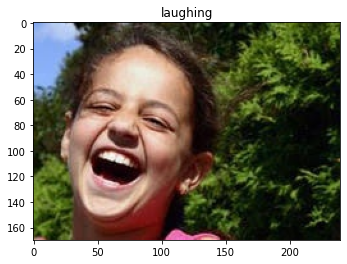

In [ ]:
displaying_random_images()

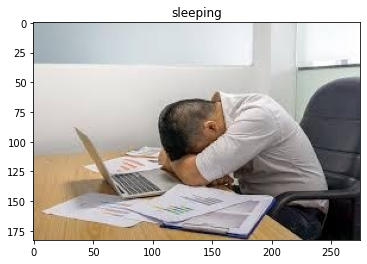

In [ ]:
displaying_random_images()

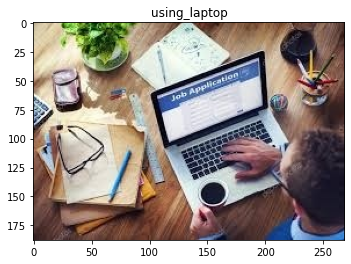

In [ ]:
displaying_random_images()

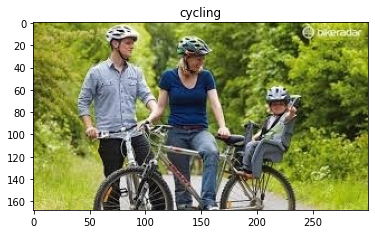

In [ ]:
displaying_random_images()

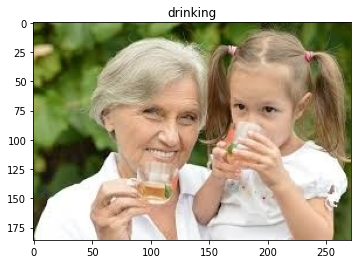

In [ ]:
displaying_random_images()

# 5| Data preprocessing

In [26]:
import os
import numpy as np
from PIL import Image

img_data = []
img_label = []

# 假设您的测试图像存储在名为 test_data 的文件夹中，其中每个子文件夹是一个类别
test_folder = 'train_data/'

# 遍历每个子文件夹
for label in os.listdir(test_folder):
    label_folder = os.path.join(test_folder, label)

    # 确保当前路径是一个目录
    if os.path.isdir(label_folder):
        # 遍历每个子文件夹中的图像文件
        for filename in os.listdir(label_folder):
            if filename.endswith('.jpg'):  # 假设您只处理 .jpg 文件
                # 读取图像数据
                img_path = os.path.join(label_folder, filename)
                temp_img = Image.open(img_path)
                resized_img = temp_img.resize((160, 160))  # 调整图像大小
                img_data.append(np.asarray(resized_img))

                # 将标签添加到 img_label_2 中
                img_label.append(label)

In [27]:
import os
import numpy as np
from PIL import Image

img_data_2 = []
img_label_2 = []

# 假设您的测试图像存储在名为 test_data 的文件夹中，其中每个子文件夹是一个类别
test_folder = 'test_data/'

# 遍历每个子文件夹
for label in os.listdir(test_folder):
    label_folder = os.path.join(test_folder, label)

    # 确保当前路径是一个目录
    if os.path.isdir(label_folder):
        # 遍历每个子文件夹中的图像文件
        for filename in os.listdir(label_folder):
            if filename.endswith('.jpg'):  # 假设您只处理 .jpg 文件
                # 读取图像数据
                img_path = os.path.join(label_folder, filename)
                temp_img = Image.open(img_path)
                resized_img = temp_img.resize((160, 160))  # 调整图像大小
                img_data_2.append(np.asarray(resized_img))

                # 将标签添加到 img_label_2 中
                img_label_2.append(label)

In [29]:
print(img_label_2)

['calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling', 'calling'

In [30]:
img_shape= (160,160,3)

In [31]:
iii = img_data
iii = np.asarray(iii)
type(iii)
iii.shape

(15000, 160, 160, 3)

In [32]:
iiii = img_data_2
iiii = np.asarray(iiii)
type(iiii)
iiii.shape

(3000, 160, 160, 3)

In [33]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])
print(y_train.shape)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(15000, 15)


In [34]:
y_test_label = to_categorical(np.asarray(test_data["label"].factorize()[0]))
print(y_test_label[0])
print(y_test_label.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(3000, 15)


In [35]:
dir(tf.keras.applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'ResNet50',
 'ResNet50V2',
 'VGG16',
 'VGG19',
 'Xception',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'convnext',
 'densenet',
 'efficientnet',
 'efficientnet_v2',
 'imagenet_utils',
 'inception_resnet_v2',
 'inception_v3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3',
 'nas

# 6| Make an CNN model

In [36]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
efficientnet_model.summary()

In [37]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [39]:

history2 = efficientnet_model.fit(iii,y_train, epochs=40, validation_data=(iiii,y_test_label))


Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4376s 9s/step - accuracy: 0.5417 - loss: 1.4579 - val_accuracy: 0.6150 - val_loss: 1.1768
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4761s 10s/step - accuracy: 0.7099 - loss: 0.9050 - val_accuracy: 0.6390 - val_loss: 1.1417
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4673s 10s/step - accuracy: 0.7770 - loss: 0.6951 - val_accuracy: 0.6440 - val_loss: 1.1759
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4348s 9s/step - accuracy: 0.8380 - loss: 0.5138 - val_accuracy: 0.6310 - val_loss: 1.2239
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4411s 9s/step - accuracy: 0.8810 - loss: 0.3852 - val_accuracy: 0.6500 - val_loss: 1.2747
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4660s 10s/step - accuracy: 0.9101 - loss: 0.2810 - val_accuracy: 0.6443 - val_loss: 1.3679
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4711s 10s/step - accuracy: 0.9376 - loss: 0.2115 - val_accuracy: 0.6413 - val_loss: 1.4190
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 4593s 10s/step - accuracy: 0.9490 - loss: 0.1

In [ ]:
efficientnet_model.save('Human_Action_Recognition_(HAR)_EfficientNetB7_CNN_new.h5')

c:\Users\user\anaconda3\envs\AICourse\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



In [ ]:
from tensorflow.keras.models import load_model


# Load your trained model
efficientnet2_model = load_model('Human_Action_Recognition_(HAR)_EfficientNetB7_CNN_new.h5')  # Load your saved model here

In [ ]:
from keras.callbacks import EarlyStopping

# 定義早停止回調函數
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto', verbose=1)

# 或者同時監控驗證集的損失函數和準確率
early_stopping = EarlyStopping(monitor='val_loss', patience=7, mode='auto', verbose=1, restore_best_weights=True)
efficientnet2_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
efficientnet2_model.summary()

In [ ]:
history2 = efficientnet2_model.fit(iii,y_train, epochs=80, validation_data=(iiii,y_test_label),callbacks=[early_stopping])

In [ ]:
efficientnet2_model.save('Human_Action_Recognition_(HAR)_EfficientNetB7_CNN_new2.h5')

In [ ]:
#vgg_modle_80_new
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # 設置圖片大小為寬度10英寸，高度5英寸

# 获取训练集和验证集的损失和准确率数据
train_losses = history.history["loss"]
val_losses = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

# 绘制训练集和验证集的损失曲线
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# 绘制训练集和验证集的准确率曲线
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
#vgg_modle_80_new
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  # 設置圖片大小為寬度10英寸，高度5英寸

# 获取训练集和验证集的损失和准确率数据
train_losses = history2.history["loss"]
val_losses = history2.history["val_loss"]
train_acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]

# 绘制训练集和验证集的损失曲线
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# 绘制训练集和验证集的准确率曲线
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [ ]:

def test_predict(test_image, train_data):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result == np.max(result))
    #prediction = itemindex[1][0]
    prediction_index = itemindex[1][0]
    prediction_index_all = itemindex
    print("probability: {:.2f}%\nPredicted class : {}".format(np.max(result) * 100, prediction_index))

    labels = test_data['label'].unique().tolist()
    prediction_label = labels[prediction_index]
    print("Predicted class label: {}".format(prediction_label))

    image = img.imread(test_image)
    plt.imshow(image)

labels = test_data['label'].unique().tolist()
print("All labels:")
for index, label in enumerate(labels):
    print(f"{index}: {label}")

In [ ]:
label_to_index = {label: index for index, label in enumerate(labels)}

print("label_to_index:")
print(label_to_index)
list_length = len(label_to_index)
print("列表的總數為:", list_length)

In [ ]:
#history:1
from sklearn.metrics import classification_report
from keras.models import load_model
#VGG16_model = load_model('Human_Action_Recognition_(HAR)_VGG16_final80_new.h5')  # Load your saved model here
predictions = efficientnet_model.predict(iii)
# Convert predictions to class labels (from one-hot encoding)
y_pred = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to class labels

y_test = situation.map(label_to_index)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
#history:1
from sklearn.metrics import classification_report
from keras.models import load_model
#VGG16_model = load_model('Human_Action_Recognition_(HAR)_VGG16_final80_new.h5')  # Load your saved model here
predictions = efficientnet2_model.predict(iii)
# Convert predictions to class labels (from one-hot encoding)
y_pred = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to class labels

y_test = situation.map(label_to_index)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from skimage.filters import sobel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import laplacian_kernel
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel
#from skimage.feature import fisher_vector
#from sklearn.mixture import fisher_vector
from fishervector import FisherVectorGMM
def load_and_preprocess_data():
    #new dataframe X
    Y=train_csv['label']
    X_list = []

    count = 8
    for i in range(0, train_csv.shape[0]):
        img_path = train_fol[i]
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        #if img is None:
            #print("Failed to read image:", img_path)
        #else:
            #print("ok")
#         plt.figure(figsize=(10, 5))
#         plt.subplot(1,4,1)
#         plt.imshow(img, cmap='gray')
        img = cv2.resize(img, (128, 128))
#         plt.subplot(1,4,2)
#         plt.imshow(img, cmap='gray')
        img = cv2.Canny(img, 100, 200)
#         plt.subplot(1,4,3)
#         plt.imshow(img, cmap='gray')
#         extended_laplacian_kernel = np.array([[0, -1, 0],
#                                            [-1, 5, -1],
#                                            [0, -1, 0]])
#         img_after = cv2.filter2D(img, -1, extended_laplacian_kernel)
        img = polynomial_kernel(img)
#         print(img.shape,'\n')
# #         count = count -1
# #         if count == 0:
# #             break
#         img=sobel(img)
#         img = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),visualize=False,feature_vector=True)
#         img  = np.array(img)
#         img = img.reshape(1,-1)
#         predict = gmm.predict_proba(img)


#         # Compute the Fisher vectors
#         training_fvs = np.array([
#             fisher_vector(descriptor_mat, gmm)
#             for descriptor_mat in train_descriptors
#         ])

#         FV = []

#         for i in range(gmm.n_components):
#             mean_i = gmm.means_[i]
#             cov_i = gmm.covariances_[i]
#             diff = img - mean_i
#             FV.append(np.sum(predict[:, i].reshape(-1, 1) * diff, axis=0))
#         FV = np.concatenate(FV)

#         img = np.array(FV)
        img = img.reshape(-1)

        X_list.append(img)

#     # Compute the Fisher vectors

#     training_fvs = []

#     for feature in X_list:
#         feature = feature.reshape(1, -1)
#         fv = fisher_vector(feature, gmm)
#         training_fvs.append(fv)

#     training_fvs = np.array(training_fvs)
    X_list =  np.array(X_list)

    X = pd.DataFrame(X_list)
    return X,Y

def create_class_pairs(classes):
    class_pairs = [(classes[i], classes[j]) for i in range(len(classes)) for j in range(i+1, len(classes))]
    return class_pairs

# Load and preprocess data
X, y = load_and_preprocess_data()

le=LabelEncoder()
y=le.fit_transform(y)

# List of unique classes in the dataset
classes = np.unique(y)

class_pairs = create_class_pairs(classes)
accuracies_df = pd.DataFrame(columns=['Class1', 'Class2', 'Accuracy'])
accuracy_data = []

for pair in class_pairs:
    # Select data for the current pair of classes
    class1, class2 = pair
    indices = np.where((y == class1) | (y == class2))
    X_pair = X.iloc[indices]
    y_pair = y[indices]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    class1=le.inverse_transform([class1])[0]
    class2=le.inverse_transform([class2])[0]

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for classes {class1} vs {class2}: {accuracy}")
    accuracy_data.append({'Class1': class1, 'Class2': class2, 'Accuracy': accuracy})



Accuracy for classes calling vs clapping: 0.4642857142857143
Accuracy for classes calling vs cycling: 0.5238095238095238
Accuracy for classes calling vs dancing: 0.4851190476190476
Accuracy for classes calling vs drinking: 0.5029761904761905
Accuracy for classes calling vs eating: 0.4494047619047619
Accuracy for classes calling vs fighting: 0.46726190476190477
Accuracy for classes calling vs hugging: 0.5029761904761905
Accuracy for classes calling vs laughing: 0.5297619047619048
Accuracy for classes calling vs listening_to_music: 0.5178571428571429
Accuracy for classes calling vs running: 0.49404761904761907
Accuracy for classes calling vs sitting: 0.5029761904761905
Accuracy for classes calling vs sleeping: 0.5059523809523809
Accuracy for classes calling vs texting: 0.5
Accuracy for classes calling vs using_laptop: 0.5059523809523809
Accuracy for classes clapping vs cycling: 0.4791666666666667
Accuracy for classes clapping vs dancing: 0.5029761904761905
Accuracy for classes clapping v

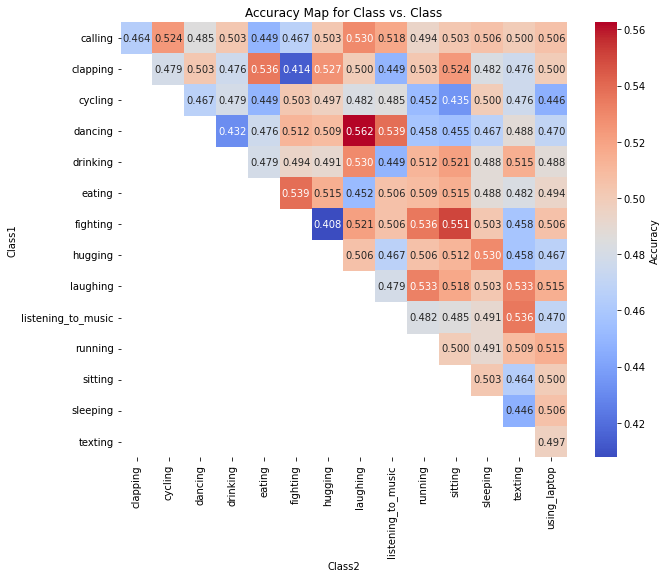

In [ ]:
accuracies_df = pd.concat([pd.DataFrame([x]) for x in accuracy_data], ignore_index=True)



heatmap_data = accuracies_df.pivot(index='Class1', columns='Class2', values='Accuracy')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Map for Class vs. Class')
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from fishervector import FisherVectorGMM

def load_and_preprocess_data():
    X_list = []
    Y = []

    for folder_path in train_fol:
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:  # 檢查圖像是否成功讀取
                img = cv2.resize(img, (160, 160))
                img = img / 255.0
                X_list.append(img)
                Y.append(os.path.basename(folder_path))

    X = np.array(X_list)
    Y = np.array(Y)
    return X, Y

# Load and preprocess data
X, y = load_and_preprocess_data()

le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from tensorflow.keras.models import load_model
# Load your trained model
model = load_model('Human_Action_Recognition_(HAR)_EfficientNetB7_CNN.h5')  # Load your saved model here

def create_class_pairs(classes):
    class_pairs = [(classes[i], classes[j]) for i in range(len(classes)) for j in range(i+1, len(classes))]
    return class_pairs
# List of unique classes in the dataset
classes = np.unique(y)

class_pairs =create_class_pairs(classes)
accuracies_df = pd.DataFrame(columns=['Class1', 'Class2', 'Accuracy'])
accuracy_data = []

for pair in class_pairs:
    # Select data for the current pair of classes
    class1, class2 = pair
    indices = np.where((y == class1) | (y == class2))
    X_pair = X[indices]
    y_pair = y[indices]

    # Make predictions on the pair of classes
    y_pred = model.predict(X_pair)

    class1 = le.inverse_transform([class1])[0]
    class2 = le.inverse_transform([class2])[0]

    # Evaluate the classifier
    accuracy = accuracy_score(np.argmax(y_pred, axis=1), y_pair)
    print(f"Accuracy for classes {class1} vs {class2}: {accuracy}")
    accuracy_data.append({'Class1': class1, 'Class2': class2, 'Accuracy': accuracy})

In [ ]:
accuracies_df = pd.concat([pd.DataFrame([x]) for x in accuracy_data], ignore_index=True)



heatmap_data = accuracies_df.pivot(index='Class1', columns='Class2', values='Accuracy')
plt.figure(figsize=(8, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Map for Class vs. Class')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
# Load your trained model
model = load_model('Human_Action_Recognition_(HAR)_EfficientNetB7_CNN.h5')  # Load your saved model here

# List of unique classes in the dataset
classes = np.unique(y)

class_pairs = create_class_pairs(classes)
accuracies_df = pd.DataFrame(columns=['Class1', 'Class2', 'Accuracy'])
accuracy_data = []

for pair in class_pairs:
    # Select data for the current pair of classes
    class1, class2 = pair
    indices = np.where((y == class1) | (y == class2))
    X_pair = X[indices]
    y_pair = y[indices]

    # Make predictions on the pair of classes
    y_pred = model.predict(X_pair)

    class1 = le.inverse_transform([class1])[0]
    class2 = le.inverse_transform([class2])[0]

    # Evaluate the classifier
    accuracy = accuracy_score(np.argmax(y_pred, axis=1), y_pair)
    print(f"Accuracy for classes {class1} vs {class2}: {accuracy}")
    accuracy_data.append({'Class1': class1, 'Class2': class2, 'Accuracy': accuracy})

Accuracy for classes calling vs clapping: 0.0
Accuracy for classes calling vs cycling: 0.0
Accuracy for classes calling vs dancing: 0.5
Accuracy for classes calling vs drinking: 0.0
Accuracy for classes calling vs eating: 0.0
Accuracy for classes calling vs fighting: 0.0
Accuracy for classes calling vs hugging: 0.0
Accuracy for classes calling vs laughing: 0.0
Accuracy for classes calling vs listening_to_music: 0.0
Accuracy for classes calling vs running: 0.0
Accuracy for classes calling vs sitting: 0.0
Accuracy for classes calling vs sleeping: 0.0
Accuracy for classes calling vs texting: 0.0
Accuracy for classes calling vs using_laptop: 0.0
Accuracy for classes clapping vs cycling: 0.0
Accuracy for classes clapping vs dancing: 0.5
Accuracy for classes clapping vs drinking: 0.0
Accuracy for classes clapping vs eating: 0.0
Accuracy for classes clapping vs fighting: 0.0
Accuracy for classes clapping vs hugging: 0.0
Accuracy for classes clapping vs laughing: 0.0
Accuracy for classes clapp

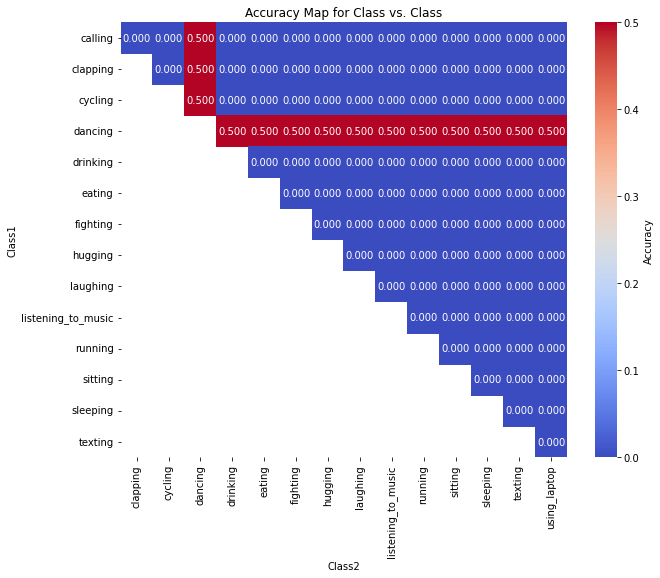

In [ ]:
accuracies_df = pd.concat([pd.DataFrame([x]) for x in accuracy_data], ignore_index=True)



heatmap_data = accuracies_df.pivot(index='Class1', columns='Class2', values='Accuracy')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={'label': 'Accuracy'})
plt.title('Accuracy Map for Class vs. Class')
plt.show()

# 7| Model predictions

In [ ]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [ ]:
def test_predict(test_image, train_data):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result == np.max(result))
    #prediction = itemindex[1][0]
    prediction_index = itemindex[1][0]
    prediction_index_all = itemindex
    print("probability: {:.2f}%\nPredicted class : {}".format(np.max(result) * 100, prediction_index))

    labels = train_data['label'].unique().tolist()
    prediction_label = labels[prediction_index]
    print("Predicted class label: {}".format(prediction_label))

    image = img.imread(test_image)
    plt.imshow(image)

labels = train_data['label'].unique().tolist()
print("All labels:")
for index, label in enumerate(labels):
    print(f"{index}: {label}")



All labels:
0: sitting
1: using_laptop
2: hugging
3: sleeping
4: drinking
5: clapping
6: dancing
7: cycling
8: calling
9: laughing
10: eating
11: fighting
12: listening_to_music
13: running
14: texting


In [ ]:
label_to_index = {label: index for index, label in enumerate(labels)}

print("label_to_index:")
print(label_to_index)

label_to_index:
{'sitting': 0, 'using_laptop': 1, 'hugging': 2, 'sleeping': 3, 'drinking': 4, 'clapping': 5, 'dancing': 6, 'cycling': 7, 'calling': 8, 'laughing': 9, 'eating': 10, 'fighting': 11, 'listening_to_music': 12, 'running': 13, 'texting': 14}


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
label_test = pd.read_csv("label.csv")
label_test.head(16)


,label
0,Calling
1,Clapping
2,Cycling
3,Dancing
4,Drinking
5,Eating
6,Fighting
7,Hugging
8,Laughing
9,Listenning to Music


In [ ]:
predictions = efficientnet_model.predict(iii)

# Convert predictions to class labels (from one-hot encoding)
y_pred = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to class labels

y_test = situation.map(label_to_index)


# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       840
           2       1.00      1.00      1.00       840
           3       1.00      0.99      0.99       840
           4       1.00      1.00      1.00       840
           5       1.00      1.00      1.00       840
           6       1.00      1.00      1.00       840
           7       1.00      1.00      1.00       840
           8       1.00      1.00      1.00       840
           9       0.99      1.00      0.99       840
          10       1.00      1.00      1.00       840
          11       1.00      1.00      1.00       840
          12       1.00      1.00      1.00       840
          13       1.00      1.00      1.00       840
          14       0.99      1.00      1.00       840

    accuracy                           1.00     12600
   macro avg       1.00      1.00      1.00     12600
we

In [ ]:
label_to_index = {label: index for index, label in enumerate(labels)}

print("label_to_index:")
print(label_to_index)

label_to_index:
{'sitting': 0, 'using_laptop': 1, 'hugging': 2, 'sleeping': 3, 'drinking': 4, 'clapping': 5, 'dancing': 6, 'cycling': 7, 'calling': 8, 'laughing': 9, 'eating': 10, 'fighting': 11, 'listening_to_music': 12, 'running': 13, 'texting': 14}


In [ ]:
predictions = efficientnet_model.predict(iii)

# Convert predictions to class labels (from one-hot encoding)
y_pred = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to class labels

y_test = situation.map(label_to_index)


# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       840
           1       0.69      0.79      0.73       840
           2       0.72      0.66      0.69       840
           3       0.75      0.87      0.81       840
           4       0.53      0.83      0.65       840
           5       0.71      0.67      0.69       840
           6       0.75      0.80      0.78       840
           7       0.96      0.95      0.95       840
           8       0.61      0.59      0.60       840
           9       0.72      0.75      0.73       840
          10       0.86      0.80      0.83       840
          11       0.77      0.73      0.75       840
          12       0.74      0.36      0.48       840
          13       0.79      0.80      0.79       840
          14       0.71      0.51      0.59       840

    accuracy                           0.72     12600
   macro avg       0.73      0.72      0.71     12600
we

In [ ]:
predictions = model.predict(iiii)

# Convert predictions to class labels (from one-hot encoding)
y_pred = np.argmax(predictions, axis=1)

# Convert test labels from one-hot encoding to class labels
y_test = np.argmax(y_test_label, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.03      0.02       200
           1       0.02      0.02      0.02       200
           2       0.00      0.00      0.00       200
           3       0.01      0.01      0.01       200
           4       0.72      0.84      0.78       200
           5       0.10      0.10      0.10       200
           6       0.08      0.09      0.09       200
           7       0.00      0.00      0.00       200
           8       0.01      0.01      0.01       200
           9       0.05      0.06      0.05       200
          10       0.00      0.00      0.00       200
          11       0.02      0.01      0.02       200
          12       0.03      0.03      0.03       200
          13       0.01      0.01      0.01       200
          14       0.02      0.03      0.02       200

    accuracy                           0.08      3000
   macro avg       0.07      0.08      0.08      3000
we

In [ ]:
print('y_train.shape:',y_train.shape)
print('iii:',iii.shape)

y_train.shape: (1344,)
iii: (12600, 160, 160, 3)


probability: 100.00%
Predicted class : 13
Predicted class label: running


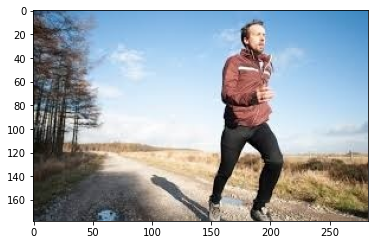

In [ ]:
test_predict("test/Image_100.jpg", train_data)

probability: 52.53%
Predicted class : 6
Predicted class label: dancing


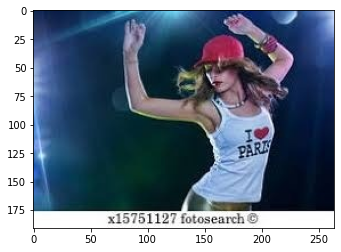

In [ ]:
test_predict("test/Image_950.jpg",train_data)

probability: 59.90%
Predicted class : 5
Predicted class label: clapping


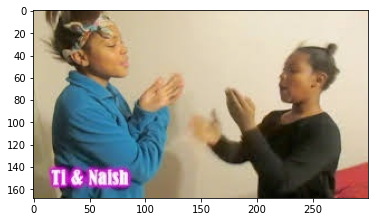

In [ ]:
test_predict("test/Image_1056.jpg",train_data)

probability: 81.88%
Predicted class : 1
Predicted class label: using_laptop


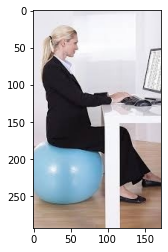

In [ ]:
test_predict("test/Image_104.jpg",train_data)

probability: 99.80%
Predicted class : 13
Predicted class label: running


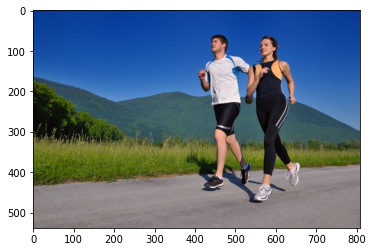

In [ ]:
test_predict("mydata/img_1.jpg",train_data)

probability: 60.58%
Predicted class : 9
Predicted class label: laughing


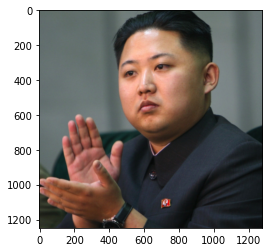

In [ ]:
test_predict("mydata/img_2.jpg",train_data)

probability: 100.00%
Predicted class : 13
Predicted class label: running


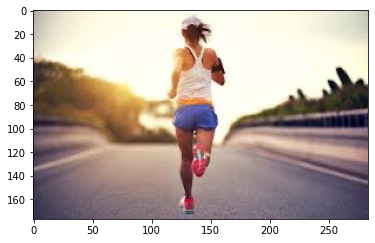

In [ ]:
test_predict("mydata/img_3.jpg",train_data)

probability: 36.63%
Predicted class : 10
Predicted class label: eating


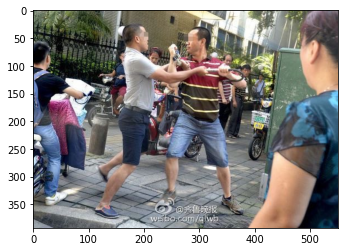

In [ ]:
test_predict("mydata/img_4.jpg",train_data)

probability: 96.75%
Predicted class : 4
Predicted class label: drinking


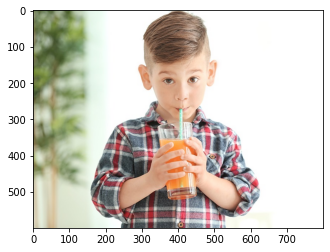

In [ ]:
test_predict("mydata/img_5.jpg",train_data)

probability: 98.96%
Predicted class : 9
Predicted class label: laughing


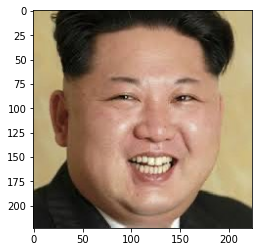

In [ ]:
test_predict("mydata/img_6.jpg",train_data)

probability: 88.82%
Predicted class : 2
Predicted class label: hugging


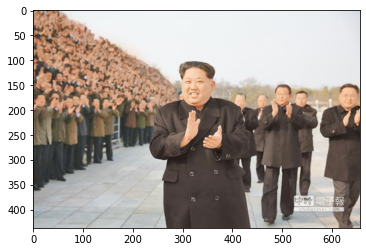

In [ ]:
test_predict("mydata/img_7.jpg",train_data)

probability: 99.99%
Predicted class : 4
Predicted class label: drinking


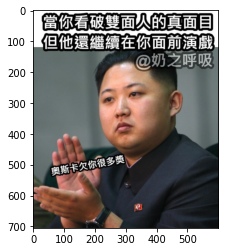

In [ ]:
test_predict("mydata/img_8.jpg",train_data)

probability: 100.00%
Predicted class : 5
Predicted class label: clapping


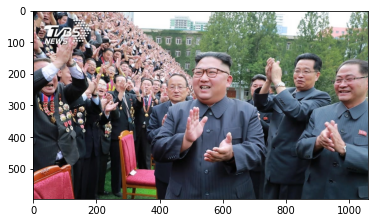

In [ ]:
test_predict("mydata/img_9.jpg",train_data)

probability: 60.41%
Predicted class : 5
Predicted class label: clapping


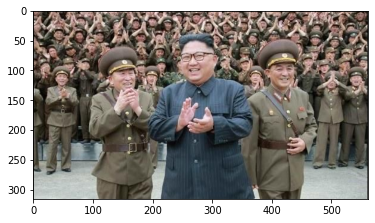

In [ ]:
test_predict("mydata/img_10.jpg",train_data)

probability: 44.02%
Predicted class : 5
Predicted class label: clapping


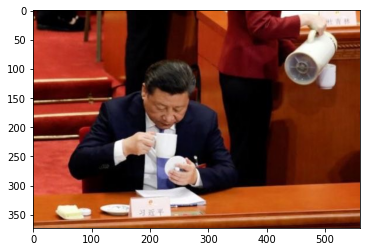

In [ ]:
test_predict("mydata/img_11.jpg",train_data)

probability: 26.83%
Predicted class : 6
Predicted class label: dancing


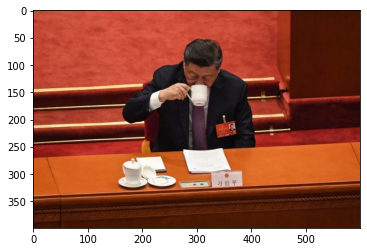

In [ ]:
test_predict("mydata/img_12.jpg",train_data)

probability: 92.65%
Predicted class : 5
Predicted class label: clapping


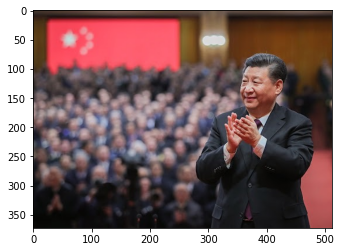

In [ ]:
test_predict("mydata/img_13.jpg",train_data)

probability: 23.96%
Predicted class : 5
Predicted class label: clapping


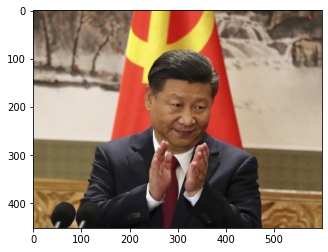

In [ ]:
test_predict("mydata/img_14.jpg",train_data)